In [36]:
import warnings
warnings.simplefilter("error", [RuntimeWarning, TypeError])

In [1]:
import numpy as np

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [59]:
import pandas as pd
from preprocess import get_train_test
import matplotlib.pyplot as plt

"""
prced_train: "결측치 LR로 처리", date 분리 완료된 df
r_train: DACON에서 받은 raw data
train: r_train에서 date 분리만 완료. 결측치 남아있음.
"""

prced_train = pd.read_csv('./dataset/train.csv')
X, X_year, y, X_test, X_test_year, y_test = get_train_test()
submit_csv = pd.read_csv("./dataset/raw/sample_submission.csv")
prced_train[:5]

,index,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0,-4.440156,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,1,1
1,1,-3.552492,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,1,2
2,2,-4.954678,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,1,3
3,3,0.307631,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,1,4
4,4,-4.067014,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,1,5


# 결측치 제거


In [8]:
r_train = pd.read_csv("./dataset/raw/train.csv")
r_train.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental'],
      dtype='object')

In [621]:
r_test = pd.read_csv("./dataset/raw/test.csv")
r_test.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max'],
      dtype='object')

In [10]:
# Train date 분리
train = r_train
train['date'] = pd.to_datetime(train['date'])
train['year'] = r_train['date'].dt.year
train['month'] = r_train['date'].dt.month
train['day'] = r_train['date'].dt.day
train = train.drop(['date'], axis=1)
train.columns

Index(['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest', 'PM10',
       'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean',
       'wind_max', 'rental', 'year', 'month', 'day'],
      dtype='object')

In [622]:
# Test date 분리
test = r_test
test['date'] = pd.to_datetime(test['date'])
test['year'] = r_test['date'].dt.year
test['month'] = r_test['date'].dt.month
test['day'] = r_test['date'].dt.day
test = test.drop(['date'], axis=1)
test.columns

Index(['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest', 'PM10',
       'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean',
       'wind_max', 'year', 'month', 'day'],
      dtype='object')

In [181]:
# 전체 결측치 개수 표시
train[train.columns].isnull().sum()

precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
year               0
month              0
day                0
dtype: int64

In [623]:
# Test 데이터 결측치 표시
test[test.columns].isnull().sum()

precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
year               0
month              0
day                0
dtype: int64

In [204]:
print(prced_train['sunshine_sum'].loc[is_null_sum])
is_null_sum.sum()

Series([], Name: sunshine_sum, dtype: float64)


0

## Sunshine sum(일조합)

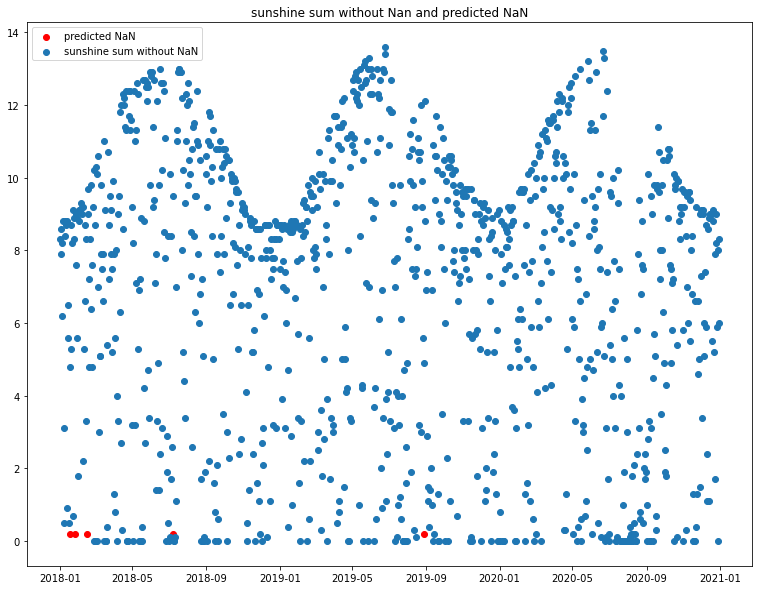

In [210]:
is_null_sum = train['sunshine_sum'].isnull()
fig = plt.figure(figsize=(13,10))
plt.scatter(r_train['date'].loc[is_null_sum], prced_train['sunshine_sum'].loc[is_null_sum], color='red', label="predicted NaN")
plt.scatter(r_train['date'].loc[is_null_sum == False], train['sunshine_sum'].loc[is_null_sum == False], label="sunshine sum without NaN")
plt.title("sunshine sum without Nan and predicted NaN")
plt.legend()

# LR로 추정한 NaN 값

In [212]:
train['sunshine_sum'].loc[is_null_sum] = prced_train['sunshine_sum'].loc[is_null_sum]
train['sunshine_sum'].loc[is_null_sum]

17     0.188839
25     0.188839
45     0.188839
187    0.188839
604    0.188839
Name: sunshine_sum, dtype: float64

In [633]:
"""
테스트 sunshine sum mean으로 채움
"""
is_null_sum = test['sunshine_sum'].isnull()
test[is_null_sum]

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
6,NaN,-14.5,-8.4,-16.5,41.0,13.0,49.9,NaN,0.0,4.1,8.3,2021,1,7


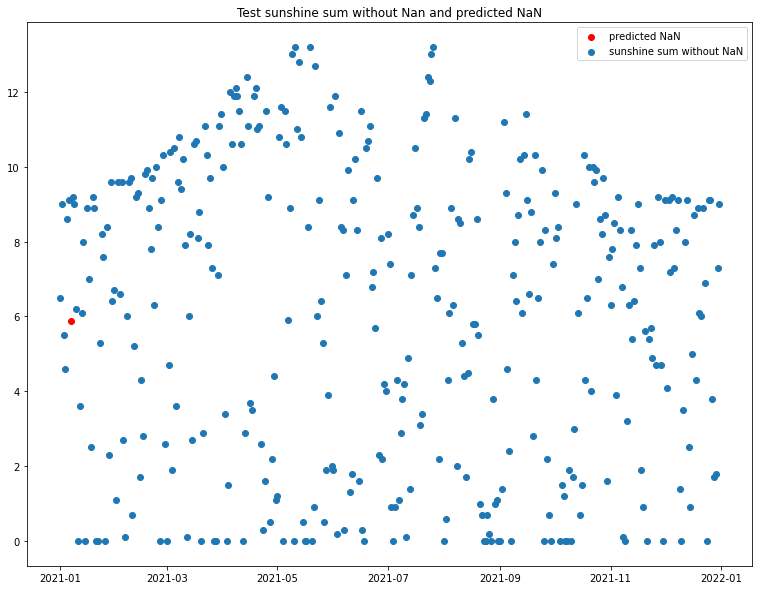

In [638]:
fig = plt.figure(figsize=(13,10))
pred = test['sunshine_sum'].loc[(test['year'] == 2021) & (test['month'] == 1)]
pred = np.mean(pred)
plt.scatter(r_test['date'].loc[is_null_sum], pred, color='red', label="predicted NaN")
plt.scatter(r_test['date'].loc[is_null_sum == False], test['sunshine_sum'].loc[is_null_sum == False], label="sunshine sum without NaN")
plt.title("Test sunshine sum without Nan and predicted NaN")
plt.legend()

test['sunshine_sum'].loc[is_null_sum] = pred

# LR로 추정한 NaN 값

## precipitation(강수량)

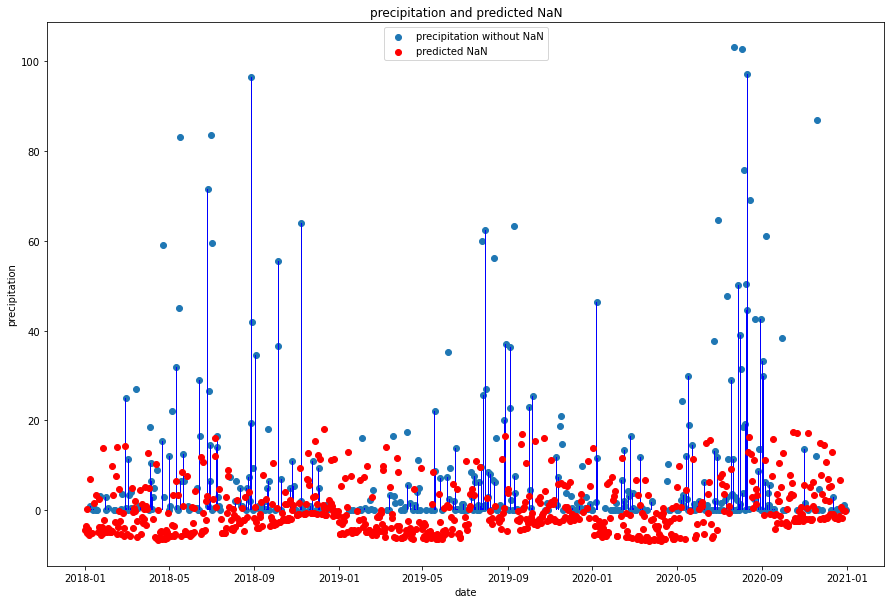

In [213]:
import matplotlib.pyplot as plt

is_null = r_train['precipitation'].isnull()

# 결측치가 아닌 값만 출력
x = r_train['date'].loc[is_null == False]
y = train['precipitation'].loc[is_null == False]

fig = plt.figure(figsize=(15, 10))
plt.title("precipitation and predicted NaN")
plt.xlabel("date")
plt.ylabel("precipitation")
plt.scatter(x, y, label="precipitation without NaN")
plt.bar(x, y, color='blue')

x = r_train['date'].loc[is_null]
y = prced_train['precipitation'].loc[is_null]
plt.scatter(x, y, color='red', label="predicted NaN")    # LR로 예측된 결측치 값 (분포를 잘 따르고 있는지)
plt.legend(loc="upper center")

# 연도별로 정규분포 형태를 보이는 것 같음.
# Linear regression 보다는 연도별로 잘라서 확률 분포를 모델링하는게 더 나아보임
# 처음 LR로 예측한 

AxesSubplot(0.125,0.657941;0.775x0.222059)
AxesSubplot(0.125,0.391471;0.775x0.222059)
AxesSubplot(0.125,0.125;0.775x0.222059)


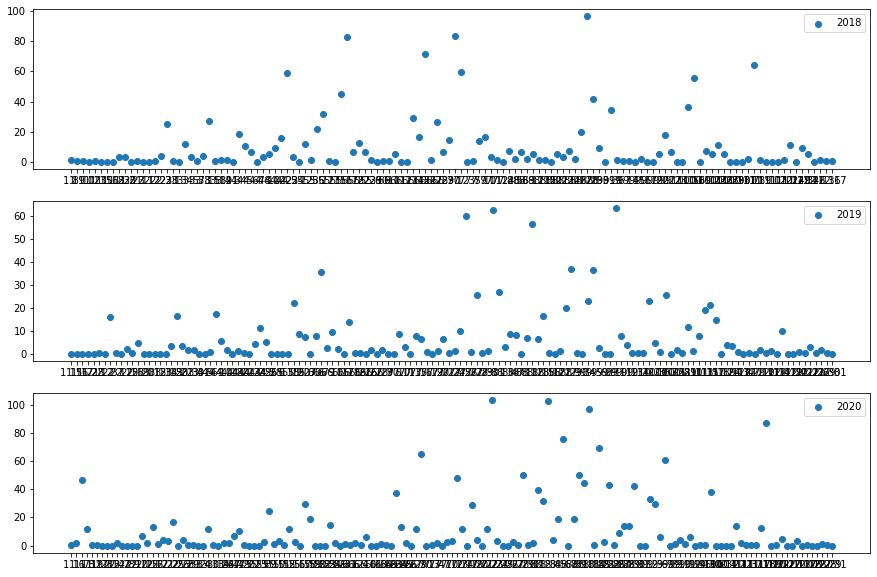

In [297]:
# 연도별로 강수량 분포 출력
# train_split: 연도별로 train을 자른 것 (미세먼지 결측치 처리 안됨)

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

is_null_pre = {}
train_split = {}

for i, year in enumerate([2018, 2019, 2020]):
#     print(i, year)
    train_split[year] = train[train['year'] == year]    # 해당 연도 df만 가져옴
    train_split[year]['m-d'] = train_split[year]['month'].map(str) + ' ' + train_split[year]['day'].map(str)
    is_null_pre[year] = train_split[year]['precipitation'].isnull()

    x = train_split[year]['m-d'].loc[is_null_pre[year] == False]
    y = train_split[year]['precipitation'].loc[is_null_pre[year] == False]
    
    ax[i].scatter(x, y)
    ax[i].legend([year])
    print(ax[i])

    
# 2020년은 좀 이상하긴 한데... 정규분포로 피팅? 아니면 다른 학습 방법이 있을까?

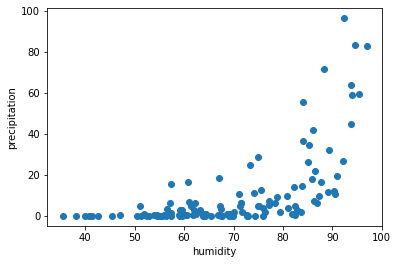

In [398]:
# 습도와 강수량
df = train_split[year]
plt.xlabel("humidity")
plt.ylabel("precipitation")
plt.scatter(df['humidity'].loc[null == False], df['precipitation'].loc[null == False])

# 지수함수로 피팅해보기

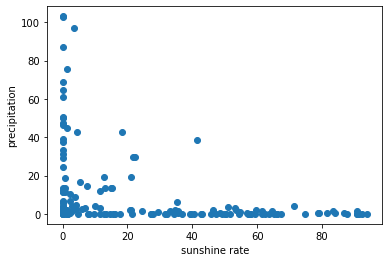

In [413]:
# 일조합와 강수량
df = train_split[year]
plt.xlabel("sunshine rate")
plt.ylabel("precipitation")
plt.scatter(df['sunshine_rate'].loc[null == False], df['precipitation'].loc[null == False])

In [501]:
"""
강수량 결측치 후보
"""
candidates = {}
candidates['poly'] = []
candidates['exp'] = []

In [642]:
# Test 강수량 결측치 후보
candidates_test = {}
candidates_test['poly'] = []
candidates_test['exp'] = []
candidates_test['mean'] = []

In [507]:
"""
1. Polynomial 추정 (일부 feature)
"""
from sklearn.preprocessing import PolynomialFeatures

year = 2020
df = train_split[year]
null = is_null_pre[year]

columns = ['humidity', 'month', 'sunshine_sum']  # 강수량, 미세먼지 2열 제거

x = df[columns].loc[null == False].values.tolist()
y = df['precipitation'].loc[null == False].values.tolist()

# poly 데이터 생성
poly_features = PolynomialFeatures(degree=2, include_bias=True) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(x)

# 학습
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

y_pred = model.predict(x_poly)

x_nan_poly = poly_features.transform(df[columns].loc[null].values.tolist())
y_nan_pred = model.predict(x_nan_poly)

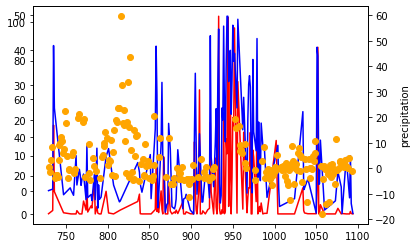

In [508]:
# 2차원 피팅 그래프 (파라미터 바꿔가면서 함)
fig, ax1 = plt.subplots()
value_idx = null[null == False].index  # null 값이 아닌 것 인덱스
null_idx = null[null == True].index    # null 인 것 인덱스

y = df['precipitation'].loc[null == False].values.tolist()
ax1.plot(value_idx, y, color='red')

ax2 = ax1.twinx()
ax2.plot(value_idx, y_pred, color='blue')    # 파란색이 y_pred

ax3 = ax2.twinx()
ax3.scatter(null_idx, y_nan_pred, color='orange')
plt.xlabel("date")
plt.ylabel("precipitation")

plt.show()

candidates['poly'].extend(y_nan_pred)

In [575]:
len(candidates['poly'])
# 678개 확인

for i in range(len(candidates['poly'])):
    if candidates['poly'][i] <= 0:
        candidates['poly'][i] = 0.0

In [576]:
candidates['poly']

[9.85739289466241,
 5.911990963948313,
 5.061881284276069,
 5.854534511940869,
 0.0,
 0.7624649711669633,
 9.964904607539921,
 0.0,
 0.0,
 0.0,
 4.093782043897079,
 0.0,
 14.042284612078248,
 5.165280283289576,
 23.167688268933574,
 21.506981542529545,
 25.293400263159256,
 12.162771114017232,
 15.52229759677138,
 16.456041639314563,
 3.2930555865599445,
 0.0,
 7.352239201574065,
 11.902399817600823,
 14.195507680503283,
 8.87439253585066,
 4.195185947976228,
 8.482774490061871,
 2.0483987474870275,
 0.0,
 0.7373702062057248,
 39.21554187943556,
 8.227139908352967,
 37.09186169112918,
 35.00701600203978,
 1.3504950101083182,
 7.598279613455645,
 23.246627627930792,
 0.0,
 7.726428142369542,
 4.053935141896432,
 5.800448694456179,
 18.54442166254543,
 0.8562358976850533,
 0.0,
 0.0,
 0.0,
 2.7108757824232725,
 0.0,
 0.0,
 0.7094320136926058,
 0.13458719326197865,
 11.025966354895587,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.6643811475397,
 0.0,
 0.0,
 0.0,
 25.4781

In [640]:
# Test
columns = ['humidity', 'month', 'sunshine_sum']  # 강수량, 미세먼지 2열 제거

null = test['precipitation'].isnull()
x = test[columns].loc[null == False].values.tolist()
y = test['precipitation'].loc[null == False].values.tolist()

# poly 데이터 생성
poly_features = PolynomialFeatures(degree=2, include_bias=True) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(x)

# 학습
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

y_pred = model.predict(x_poly)

x_nan_poly = poly_features.transform(test[columns].loc[null].values.tolist())
y_nan_pred = model.predict(x_nan_poly)

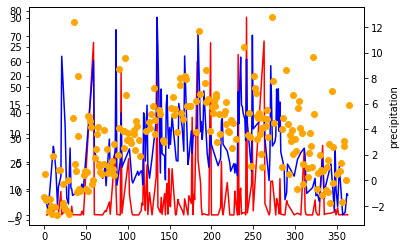

In [643]:
# Test 2차원 피팅 그래프
fig, ax1 = plt.subplots()
value_idx = null[null == False].index  # null 값이 아닌 것 인덱스
null_idx = null[null == True].index    # null 인 것 인덱스

y = test['precipitation'].loc[null == False].values.tolist()
ax1.plot(value_idx, y, color='red')

ax2 = ax1.twinx()
ax2.plot(value_idx, y_pred, color='blue')    # 파란색이 y_pred

ax3 = ax2.twinx()
ax3.scatter(null_idx, y_nan_pred, color='orange')
plt.xlabel("date")
plt.ylabel("precipitation")

plt.show()

candidates_test['poly'] = y_nan_pred

In [645]:
for i in range(len(candidates_test['poly'])):
    if candidates_test['poly'][i] <= 0:
        candidates_test['poly'][i] = 0.0
        
len(candidates_test['poly'])
# 205개 확인

205

[0.20295156] [-16.69954629]


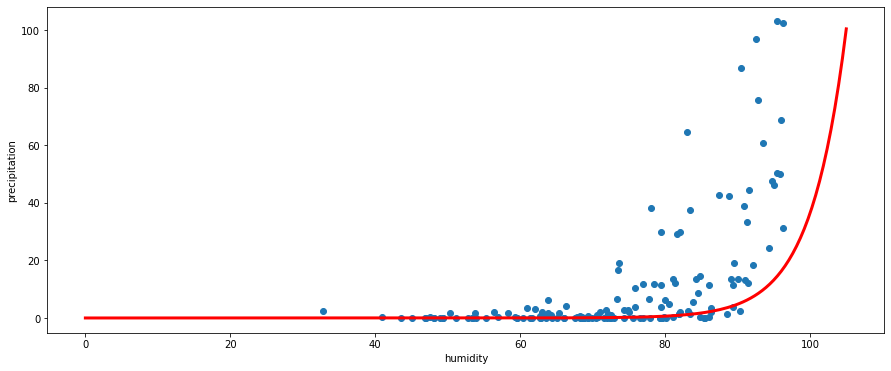

In [514]:
"""
2. 지수함수 피팅
"""
year = 2020
df = train_split[year]
null = is_null_pre[year]

# columns = ['humidity', 'month', 'sunshine_sum']
columns = ['humidity']
x = np.array(df[columns].loc[null == False].values.tolist()).reshape(-1, 1)
y = df['precipitation'].loc[null == False] + 0.0001
y = np.array(y.map(np.log)).reshape(-1, 1)   # 값이 0인 데이터 방지 0.01

model = LinearRegression()
model.fit(x, y)

xs = np.linspace(0, 105, 200)
ys = np.exp(xs*model.coef_[0] + model.intercept_) - 0.0001

fig = plt.figure(figsize=(15, 6))
plt.xlabel("humidity")
plt.ylabel("precipitation")
plt.scatter(df['humidity'].loc[null == False].values.tolist(), df['precipitation'].loc[null == False])
plt.plot(xs, ys, 'r-', lw=3)

print(model.coef_[0], model.intercept_)

xs = np.array(df['humidity'].loc[null].values.tolist())
nan_pred = np.exp(xs*model.coef_[0] + model.intercept_) - 0.0001

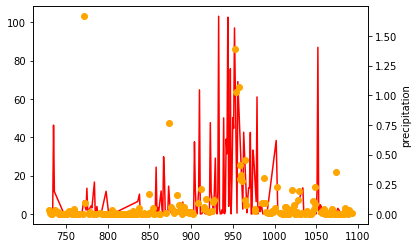

In [515]:
# 지수함수 피팅 그래프 (파라미터 바꿔가면서 함)
fig, ax1 = plt.subplots()
value_idx = null[null == False].index  # null 값이 아닌 것 인덱스
null_idx = null[null == True].index    # null 인 것 인덱스

y = df['precipitation'].loc[null == False].values.tolist()
ax1.plot(value_idx, y, color='red')

ax2 = ax1.twinx()
ax2.scatter(null_idx, nan_pred, color='orange')
plt.xlabel("date")
plt.ylabel("precipitation")

plt.show()

candidates['exp'].extend(nan_pred)

In [516]:
len(candidates['exp'])
# 678개 확인

678

[0.19337742] [-15.71009227]


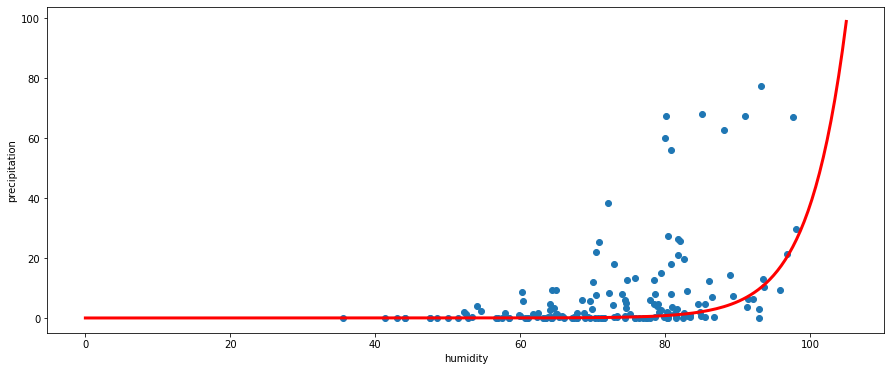

In [646]:
# Test
null = test['precipitation'].isnull()

# columns = ['humidity', 'month', 'sunshine_sum']
columns = ['humidity']
x = np.array(test[columns].loc[null == False].values.tolist()).reshape(-1, 1)
y = test['precipitation'].loc[null == False] + 0.0001
y = np.array(y.map(np.log)).reshape(-1, 1)   # 값이 0인 데이터 방지 0.01

model = LinearRegression()
model.fit(x, y)

xs = np.linspace(0, 105, 200)
ys = np.exp(xs*model.coef_[0] + model.intercept_) - 0.0001

fig = plt.figure(figsize=(15, 6))
plt.xlabel("humidity")
plt.ylabel("precipitation")
plt.scatter(test['humidity'].loc[null == False].values.tolist(), test['precipitation'].loc[null == False])
plt.plot(xs, ys, 'r-', lw=3)

print(model.coef_[0], model.intercept_)

xs = np.array(test['humidity'].loc[null].values.tolist())
nan_pred = np.exp(xs*model.coef_[0] + model.intercept_) - 0.0001

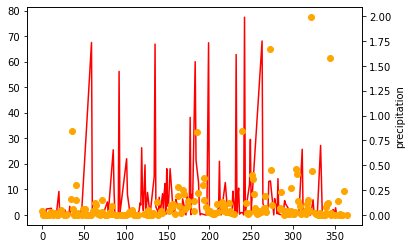

In [647]:
# Test 지수함수 피팅 그래프 (파라미터 바꿔가면서 함)
fig, ax1 = plt.subplots()
value_idx = null[null == False].index  # null 값이 아닌 것 인덱스
null_idx = null[null == True].index    # null 인 것 인덱스

y = test['precipitation'].loc[null == False].values.tolist()
ax1.plot(value_idx, y, color='red')

ax2 = ax1.twinx()
ax2.scatter(null_idx, nan_pred, color='orange')
plt.xlabel("date")
plt.ylabel("precipitation")

plt.show()

candidates_test['exp'].extend(nan_pred)

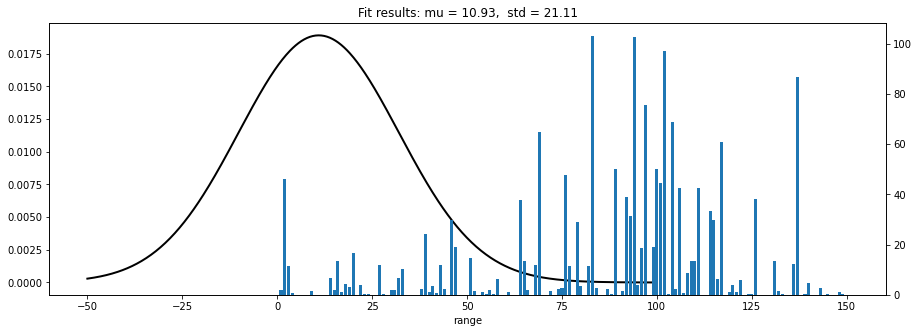

In [358]:
"""
3. 정규분포로 강수량 피팅
"""
from scipy.stats import norm

year = 2020
df = train_split[year]
null = is_null_pre[year]

mu, std = norm.fit(df['precipitation'].loc[null == False])

fig, ax1 = plt.subplots(figsize=(15,5))

plt.xlabel("range")

xmin, xmax = plt.xlim()
x = np.linspace(-50, 100, 600)
p = norm.pdf(x, mu, std)
# plt.plot(range(len(y)), p, 'k', linewidth=2)
ax1.plot(x, p, 'k', linewidth=2)

ax2 = ax1.twinx()
x = df['m-d'].loc[null == False]
y = df['precipitation'].loc[null == False]

ax2.bar(range(len(y)), y)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Ummmm.....

In [380]:
"""
4. Polynomial 추정 (전체 feature 대상)
"""
from sklearn.preprocessing import PolynomialFeatures

year = 2018
df = train_split[year]
null = is_null_pre[year]

columns = ['temp_mean', 'temp_highest', 'temp_lowest','humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean',
       'wind_max', 'year', 'month', 'day']  # 강수량, 미세먼지 2열 제거

x = df[columns].loc[null == False].values.tolist()
y = df['precipitation'].loc[null == False].values.tolist()

# poly 데이터 생성
poly_features = PolynomialFeatures(degree=3, include_bias=True) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(x)

# 학습
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

y_pred = model.predict(x_poly)

x_nan_poly = poly_features.transform(df[columns].loc[null].values.tolist())
y_nan_pred = model.predict(x_nan_poly)

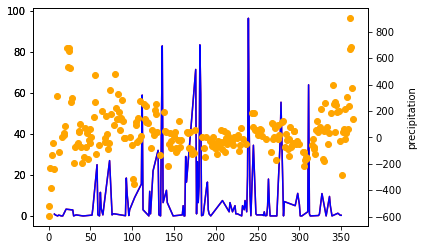

In [381]:
# 2차원 피팅 그래프 (파라미터 바꿔가면서 함)
fig, ax1 = plt.subplots()
value_idx = null[null == False].index  # null 값이 아닌 것 인덱스
null_idx = null[null == True].index    # null 인 것 인덱스

y = df['precipitation'].loc[null == False].values.tolist()
ax1.plot(value_idx, y, color='red')

ax2 = ax1.twinx()
ax2.plot(value_idx, y_pred, color='blue')    # 파란색이 y_pred

ax3 = ax2.twinx()
ax3.scatter(null_idx, y_nan_pred, color='orange')
plt.xlabel("date")
plt.ylabel("precipitation")

plt.show()

In [382]:
"""
5. Random Forest (뭔지 잘 모르겠음)
"""
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [383]:
nTreeList = range(50, 500, 10)
mseOos=[]

for iTrees in nTreeList:
    depth = None
    maxFeat = 4
    model = ensemble.RandomForestRegressor(n_estimators=iTrees,
                                          max_depth=depth, max_features=maxFeat,
                                          oob_score=False, random_state=1024)
    model.fit(x, y)
    prediction = model.predict(x)
    mseOos.append(mean_squared_error(y, prediction))

print("MSE")
print(mseOos)

MSE
[23.328878562500005, 21.760849131944447, 20.54717254464286, 20.518658715820315, 20.50758403742284, 20.4505445, 20.280239637138433, 19.866057741970483, 19.50019263590976, 20.509545069355866, 20.695275340277774, 20.783353363037108, 20.78487157223183, 20.699577473958335, 20.427376465114264, 20.301256533203127, 20.564162843679135, 20.807987211066628, 20.436601165229202, 20.247263452148434, 19.966494566249995, 20.172491313794374, 19.893708122213642, 19.97288426438935, 19.983509335054993, 20.092954357638888, 19.906803881048383, 19.99000846405029, 19.584381691919187, 19.399118512110725, 19.26845265561224, 19.27756794825424, 19.489357057500914, 19.607645653891097, 19.714256636259037, 19.528750720214838, 19.78709420313429, 20.00179376638677, 20.147207082375605, 20.2411174050071, 20.284347338734563, 20.314910465648623, 20.40448365882469, 20.331973594835066, 20.60493099587411]


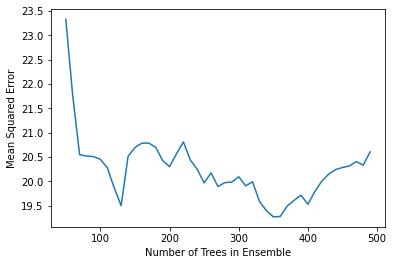

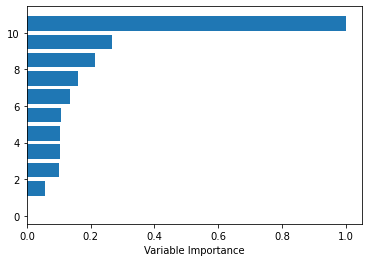

year
month
temp_mean
temp_highest
temp_lowest
day
wind_mean
wind_max
sunshine_rate
sunshine_sum
humidity


In [387]:
plt.plot(nTreeList, mseOos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

#피처 중요도 도표 그리기
featureImportance = model.feature_importances_
# print(len(featureImportance))
# print(len(columns))

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
# plt.yticks(barPos, )
plt.xlabel('Variable Importance')
plt.show()

for i in sorted_idx:
    print(columns[i])

32.47413750109292


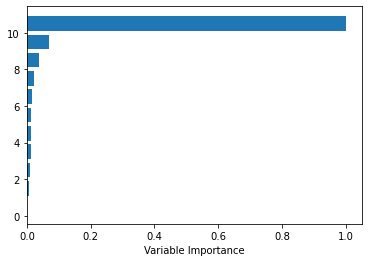

In [393]:
regr = RandomForestRegressor(max_depth=4, random_state=531,
                          n_estimators=150)
regr.fit(x, y)
prediction = regr.predict(x)
y = np.array(y)
print(mean_squared_error(y, prediction))
featureImportance = regr.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
# plt.yticks(barPos, wineNames[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

In [548]:
df = train_split[2019]
len(df['month'])
null = is_null_pre[2019]
null = np.array(null)
null[null]
df['precipitation'].iloc[:5]

365   NaN
366   NaN
367   NaN
368   NaN
369   NaN
Name: precipitation, dtype: float64

In [563]:
"""
6. 평균
"""
# try:   # candidates['mean']이 없다면 생성
#     len(candidates['mean'])
# except:
#     candidates['mean'] = []
    
year = 2020
df = train_split[year]
null = is_null_pre[year]
tmp = []

for idx in null[null].index:
    criteria = df['precipitation'].loc[(df['year'] == train['year'].iloc[idx]) & (df['month'] == train['month'].iloc[idx])]
    avg = np.mean(criteria)
    tmp.append(avg)

candidates['mean'].extend(tmp)

In [580]:
len(candidates['exp'])
# 678개 확인

678

In [648]:
# Test
tmp = []

null = test['precipitation'].isnull()
for idx in null[null].index:
    criteria = test['precipitation'].loc[(test['year'] == test['year'].iloc[idx]) & (test['month'] == test['month'].iloc[idx])]
    avg = np.mean(criteria)
    tmp.append(avg)

candidates_test['mean'].extend(tmp)

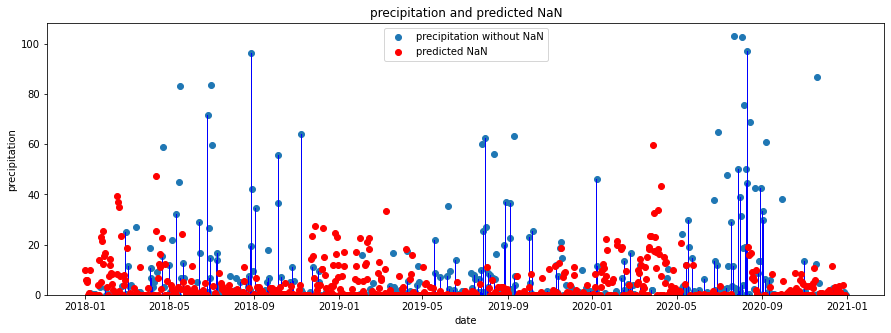

In [577]:
"""
poly 예측치 시각화 (전년도)
"""
is_null = train['precipitation'].isnull()

# 결측치가 아닌 값만 출력
x = r_train['date'].loc[is_null == False]
y = train['precipitation'].loc[is_null == False]

fig = plt.figure(figsize=(15, 5))
plt.title("precipitation and predicted NaN")
plt.xlabel("date")
plt.ylabel("precipitation")
plt.scatter(x, y, label="precipitation without NaN")
plt.bar(x, y, color='blue')

x = r_train['date'].loc[is_null]
y = candidates['poly']
plt.scatter(x, y, color='red', label="predicted NaN")    # LR로 예측된 결측치 값 (분포를 잘 따르고 있는지)
plt.legend(loc="upper center")

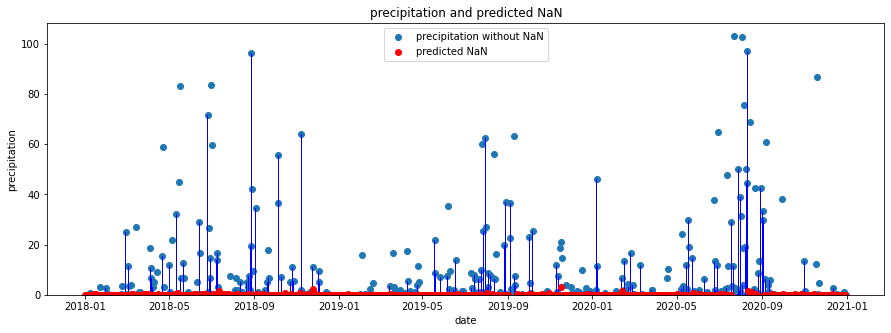

In [569]:
"""
exp 예측치 시각화 (전년도)
"""
is_null = train['precipitation'].isnull()

# 결측치가 아닌 값만 출력
x = r_train['date'].loc[is_null == False]
y = train['precipitation'].loc[is_null == False]

fig = plt.figure(figsize=(15, 5))
plt.title("precipitation and predicted NaN")
plt.xlabel("date")
plt.ylabel("precipitation")
plt.scatter(x, y, label="precipitation without NaN")
plt.bar(x, y, color='blue')

x = r_train['date'].loc[is_null]
y = candidates['exp']
plt.scatter(x, y, color='red', label="predicted NaN")    # LR로 예측된 결측치 값 (분포를 잘 따르고 있는지)
plt.legend(loc="upper center")

# 연도별로 정규분포 형태를 보이는 것 같음.
# Linear regression 보다는 연도별로 잘라서 확률 분포를 모델링하는게 더 나아보임
# 처음 LR로 예측한 

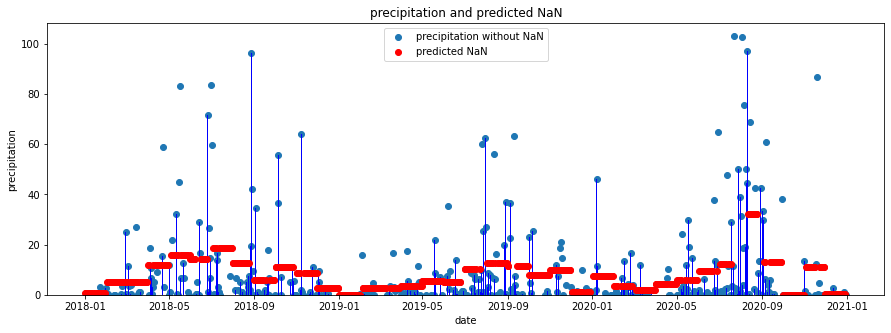

In [571]:
"""
mean 시각화 (전년도)
"""
is_null = train['precipitation'].isnull()

# 결측치가 아닌 값만 출력
x = r_train['date'].loc[is_null == False]
y = train['precipitation'].loc[is_null == False]

fig = plt.figure(figsize=(15, 5))
plt.title("precipitation and predicted NaN")
plt.xlabel("date")
plt.ylabel("precipitation")
plt.scatter(x, y, label="precipitation without NaN")
plt.bar(x, y, color='blue')

x = r_train['date'].loc[is_null]
y = candidates['mean']
plt.scatter(x, y, color='red', label="predicted NaN")    # LR로 예측된 결측치 값 (분포를 잘 따르고 있는지)
plt.legend(loc="upper center")

# ㅅㅂ 그냥 평균 때린게 가장 나은거같은데 시발

In [565]:
candidates.keys()

dict_keys(['poly', 'exp', 'mean'])

In [581]:
# 강수량 후보수치 파일 저장
import pickle

with open("./dataset/candidates_pre.pkl", 'wb') as f:
    pickle.dump(candidates, f)

In [653]:
# Test 강수량 후보수치 파일 저장
with open("./dataset/candidatest_test_pre.pkl", 'wb') as f:
    pickle.dump(candidates_test, f)

## PM10, PM2.5 (미세먼지)

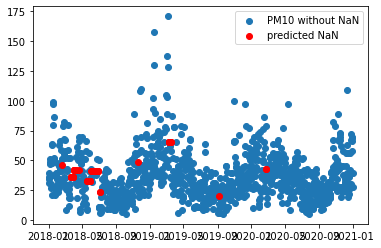

In [613]:
is_null_10 = train['PM10'].isnull()
is_null_25 = train['PM2.5'].isnull()
plt.scatter(r_train['date'].loc[is_null_10 == False], train['PM10'].loc[is_null_10 == False], label='PM10 without NaN')
plt.scatter(r_train['date'].loc[is_null_10], pm10, color='red', label='predicted NaN')
plt.legend()

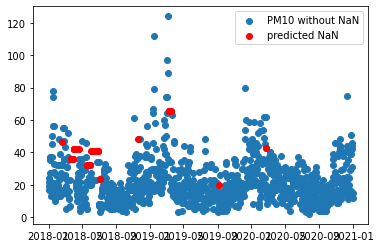

In [614]:
plt.scatter(r_train['date'].loc[is_null_25 == False], train['PM2.5'].loc[is_null_25 == False], label='PM10 without NaN')
plt.scatter(r_train['date'].loc[is_null_10], pm10, color='red', label='predicted NaN')
plt.legend()

In [616]:
corr = train.corr(method='pearson')
corr_pm10 = corr['PM10']
corr_pm25 = corr['PM2.5']

pm10 = []
pm2 = []
tmp = []

for idx in is_null_10[is_null_10].index:
    criteria = train['PM10'].loc[(train['year'] == train['year'].iloc[idx]) & (train['month'] == train['month'].iloc[idx])]
    avg = np.mean(criteria)
    tmp.append(avg)

train['PM10'].loc[is_null_10] = tmp

tmp = []
for idx in is_null_25[is_null_25].index:
    criteria = train['PM2.5'].loc[(train['year'] == train['year'].iloc[idx]) & (train['month'] == train['month'].iloc[idx])]
    avg = np.mean(criteria)
    tmp.append(avg)

train['PM2.5'].loc[is_null_25] = tmp

In [619]:
train[train.columns].isnull().sum()
# 다 채움

precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       0
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
year               0
month              0
day                0
dtype: int64

In [620]:
train.to_csv("./dataset/train.csv", sep=',', na_rep='NaN', index=False)

In [654]:
test.to_csv("./dataset/test.csv", sep=',', na_rep='NaN', index=False)